In [1]:
import os
import glob
import numpy as np
import astropy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#??
%matplotlib inline
from astropy.io import fits

#set dir_names
code_dir=os.getcwd()
main_dir=os.path.dirname(code_dir)
data_dir=os.path.join(main_dir,"data")
results_dir=os.path.join(main_dir,"results")

In [24]:
#looks for any fits files
fits_file_list=glob.glob(os.path.join(data_dir,"*.fits"))
for n in range(len(fits_file_list)):
    print(fits_file_list[n])

/home/jovyan/data/L2004220625280FE2ED6891_PH00.fits
/home/jovyan/data/L2004220625280FE2ED6891_PH00_gselected.fits
/home/jovyan/data/PSRJ2229_3deg_100mev.fits
/home/jovyan/data/L2004220625280FE2ED6891_SC00.fits


In [25]:
#define data file and shows info
fitsfile1=os.path.join(data_dir,"L2004220625280FE2ED6891_PH00_gselected.fits")
(fits.open(fitsfile1)).info()
fitsfile2=os.path.join(data_dir,"L2004220625280FE2ED6891_SC00.fits")
(fits.open(fitsfile2)).info()
filtered=os.path.join(data_dir,"PSRJ2229_3deg_100mev.fits")
(fits.open(filtered)).info()

Filename: /home/jovyan/data/L2004220625280FE2ED6891_PH00_gselected.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    222   2376R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   153R x 2C   [D, D]   
Filename: /home/jovyan/data/L2004220625280FE2ED6891_SC00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SC_DATA       1 BinTableHDU    466   24443R x 30C   [D, D, 3E, E, E, D, E, E, E, E, E, E, L, E, E, E, E, E, E, E, J, B, I, D, D, D, D, D, E, E]   
Filename: /home/jovyan/data/PSRJ2229_3deg_100mev.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    225   2084R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E

In [26]:
#reads the file and shows the header
data1, header1 = fits.getdata(fitsfile1, ext=1, header=True)

data2, header2 = fits.getdata(fitsfile2, ext=1, header=True)
header2

data_filt, header_filt = fits.getdata(filtered, ext=1, header=True)
header_filt

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   98 / width of table in bytes                        
NAXIS2  =                 2084 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   23 / number of fields in each row                   
TTYPE1  = 'ENERGY  '           / energy of event                                
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TTYPE2  = 'RA      '           / right ascension (J2000) of event               
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'DEC     '        

In [27]:
#Now we convert the data to a Astropy Table object
from astropy.table import Table

evt_data1 = Table(data1)
print("Data contains %d events" % len(evt_data1))

evt_data2 = Table(data2)
print("Data contains %d events" % len(evt_data2))

evt_data_filt= Table(data_filt)
print("Data contains %d events" % len(evt_data_filt))
evt_data_filt

Data contains 2376 events
Data contains 24443 events
Data contains 2084 events


ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
624.2603,342.50598,63.350315,109.80527,3.6161418,31.916712,326.37427,81.81243,333.1098,284517228.42904884,811888,284516854,0,0 .. 0,False .. True,False .. True,0,70.05076307058334,0.0,0.0,0.0,0.0,0.0
2208.864,333.83728,63.238804,106.38475,5.497915,35.830933,327.77817,85.77817,334.10052,284517269.7987216,894508,284516854,0,0 .. 0,False .. True,False .. True,0,111.4204358458519,0.0,0.0,0.0,0.0,0.0
311.2795,336.5012,63.144936,107.34355,4.7630014,35.87413,244.40662,85.62643,348.54733,284521712.4957771,10567727,284516854,0,0 .. 0,False .. True,False .. False,1,197.41934621334076,0.0,0.0,0.0,0.0,0.0
227.81819,341.5213,62.623737,109.074104,3.1743715,33.470882,251.01826,83.1153,345.91086,284521882.8384902,10915712,284516854,0,0 .. 0,False .. True,False .. False,1,89.02227371931076,0.0,0.0,0.0,0.0,0.0
643.99457,342.00754,63.794514,109.80935,4.112631,30.629324,291.84488,80.677536,335.29684,284539739.463351,80303,284539734,0,0 .. 0,False .. True,False .. False,1,2.5534286499023438,0.0,0.0,0.0,0.0,0.0
688.9135,338.64594,62.707283,107.95606,3.8847988,36.08286,232.42523,85.51962,353.8901,284544494.73754853,14548221,284539734,0,0 .. 0,False .. True,False .. False,1,41.644142389297485,0.0,0.0,0.0,0.0,0.0
699.05524,341.5724,63.15622,109.34193,3.6354578,42.473873,270.66037,80.96583,339.19095,284550888.7059702,7825094,284548462,0,0 .. 0,False .. True,False .. True,0,257.4678192138672,0.0,0.0,0.0,0.0,0.0
173.70444,341.26022,62.07563,108.71137,2.7455592,36.358635,273.7973,80.33832,337.81525,284550912.01156694,7867249,284548462,0,0 .. 0,False .. True,False .. False,1,280.7734159231186,0.0,0.0,0.0,0.0,0.0
102.84679,341.42606,64.03291,109.69223,4.44213,37.297123,271.34198,81.45282,339.41656,284550913.51171535,7869983,284548462,0,0 .. 0,False .. True,False .. True,0,282.2735643386841,0.0,0.0,0.0,0.0,0.0


In [29]:
#prints the column names
print('The column names are:')
columns=data_filt.columns
print(columns)

#some counter ready for use
#m=0
#for n in range(len(data_filt['Period'])):
#    if data_filt['Period'][n]<20:
#        m=m+1
#print('There are %d pulsars with period less than 20 milliseconds' % m)

The column names are:
ColDefs(
    name = 'ENERGY'; format = 'E'; unit = 'MeV'
    name = 'RA'; format = 'E'; unit = 'deg'
    name = 'DEC'; format = 'E'; unit = 'deg'
    name = 'L'; format = 'E'; unit = 'deg'
    name = 'B'; format = 'E'; unit = 'deg'
    name = 'THETA'; format = 'E'; unit = 'deg'
    name = 'PHI'; format = 'E'; unit = 'deg'
    name = 'ZENITH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'EARTH_AZIMUTH_ANGLE'; format = 'E'; unit = 'deg'
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'EVENT_ID'; format = 'J'
    name = 'RUN_ID'; format = 'J'
    name = 'RECON_VERSION'; format = 'I'
    name = 'CALIB_VERSION'; format = '3I'
    name = 'EVENT_CLASS'; format = '32X'
    name = 'EVENT_TYPE'; format = '32X'
    name = 'CONVERSION_TYPE'; format = 'I'
    name = 'LIVETIME'; format = 'D'; unit = 's'
    name = 'DIFRSP0'; format = 'E'
    name = 'DIFRSP1'; format = 'E'
    name = 'DIFRSP2'; format = 'E'
    name = 'DIFRSP3'; format = 'E'
    name = 'DIFRSP4'; format =

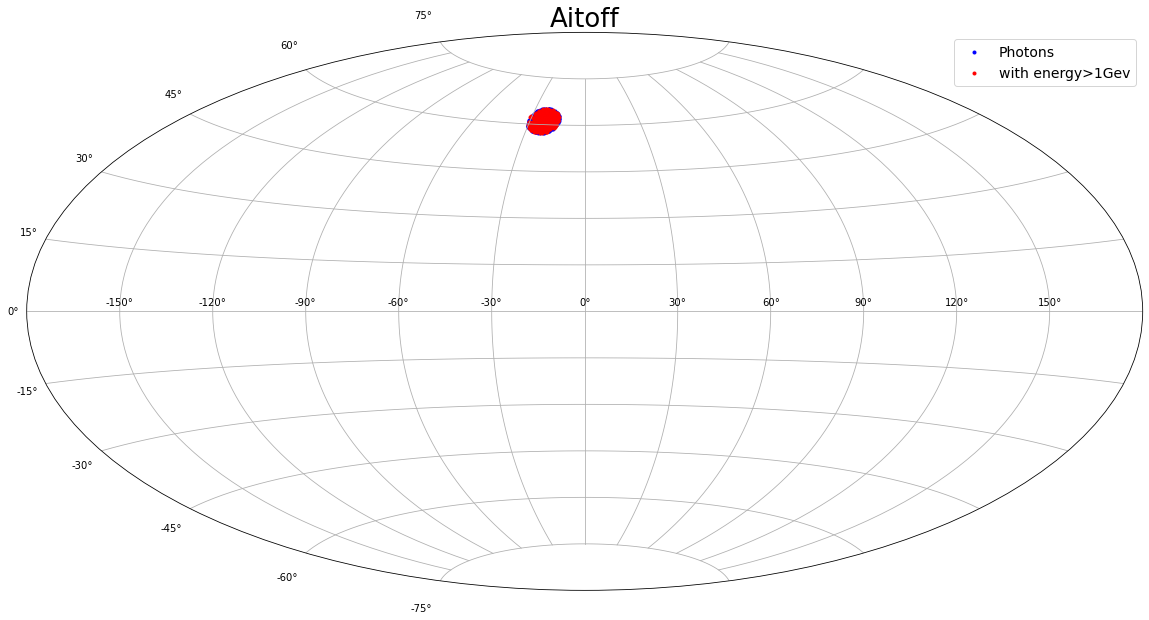

In [62]:
from astropy import units as u
from astropy.coordinates import SkyCoord

#selects photons with Energy>300Mev and >1Gev and converts their coordinate from degree to radians to be put into the aitoff projection:
#read http://docs.astropy.org/en/stable/coordinates/skycoord.html#example-1-plotting-random-data-in-aitoff-projection
ra=[]
dec=[]
ra_1000=[]
dec_1000=[]
for n in range(len(data_filt['RA'])):
    if(data_filt['ENERGY'][n]>300 and data_filt['ENERGY'][n]<=1000):
        c=SkyCoord(ra=data_filt['RA'][n]*u.degree, dec=data_filt['DEC'][n]*u.degree, frame='icrs')
        c_gal=c.galactic
        ra.append(c.ra.wrap_at(180 * u.deg).radian)
        dec.append(c.dec.radian)
    if(data_filt['ENERGY'][n]>1000):
        c=SkyCoord(ra=data_filt['RA'][n]*u.degree, dec=data_filt['DEC'][n]*u.degree, frame='icrs')
        c_gal=c.galactic
        ra_1000.append(c.ra.wrap_at(180 * u.deg).radian)
        dec_1000.append(c.dec.radian)
    

#plots
plt.figure(figsize=[20,20])
plt.subplot(111, projection="aitoff")
plt.scatter(ra,dec, marker='.', color="blue",label='Photons')
plt.scatter(ra_1000,dec_1000, marker='.', color="red",label='with energy>1Gev')
plt.title("Aitoff",fontsize=26)
plt.legend(fontsize=14)
plt.grid(True)


destinazione_aitoff="/Aitoff Plot.png"
plt.savefig(results_dir + destinazione_aitoff)

<SkyCoord (Galactic): (l, b) in deg
    (206.98913108, -11.42449097)>
1.5707963267948966 0.0
